## Imports

In [1]:
import pandas as pd
import modeling as md
import split
import numpy as np
import nltk
from itertools import chain,cycle
from IPython.display import display_html
import utilities
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer


import exploration
import modeling as md
import split

gren = '#82c7a5'

%load_ext autoreload
%autoreload 2

# Project Goals:

> * Identify elements of a README contents in order to predict the Github repository's primary programming language.
> * Create a predictive model that can take in the text of a Github repository's README and determine that repository's primary language.


## Executive Summary

### The 3 most popular programming languages used when dealing with Cryptography were:
> * Python, C++, Java
### The most common words that were used across all the README files were:
> * key, use/using, build, cryptography, test, crypto, library, hash, function, io
> * The top 10 words account for 5% of the words found in README files.
### Most common words that are related to cryptography:
> * key , cryptography, crypto, hash
> * Our K Nearest Neighbor model beat baseline with a test sample accuracy of 52.44%, which is a 192% increase in accuracy when compared to baseline.


### Acquire/Load Data

In [2]:
# Read data from csv
df = pd.read_csv('final_data.csv')
df = df.dropna()
df.head(2)

,repo,language,readme_contents,cleaned,without_stop_words,tokenized,stem,lemm
0,pyca/cryptography,Python,pyca/cryptography\n=================\n\n.. ima...,pyca cryptography image https img shields io p...,pyca cryptography image https img shields io p...,pyca cryptography image https img shields io p...,pyca cryptographi imag http img shield io pypi...,pyca cryptography image http img shield io pyp...
2,randombit/botan,C++,Botan: Crypto and TLS for Modern C++\n========...,botan crypto tls modern c botan japanese peony...,botan crypto tls modern c botan japanese peony...,botan crypto tls modern c botan japanese peony...,botan crypto tl modern c botan japanes peoni f...,botan crypto tl modern c botan japanese peony ...


## Most Frequent Words, Bigrams and Trigrams

<img src='images/words_bigrams_trigrams.png'>

### Frequency of Top Words

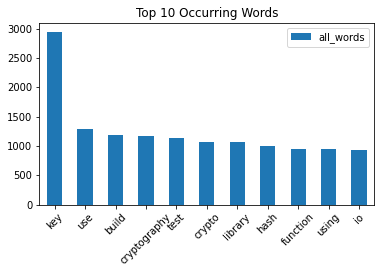

In [3]:
top_words = utilities.most_frequent_words(df)
utilities.plot_top_words(top_words)

### Takeaways:
**Top Words**
> * About half of the top words are related strictly to cryptography.
> * The top words make up about 5% of all words in the READMEs even though they are .05% of all unique words.

**Bigrams**
> * The important bigrams (i.e. not html tags) mainly consist of nist (National Institute of Standards and Technology), ACVP (Automated Cryptographic Validation Protocol), private and public key, and elliptic curve. All of these are related to cryptography.

**Trigrams**
> * ACVP is once again prevalent, as well as wikipedia. It seems that wikipedia articles were presented frequently.


## Top 3 Languages:

<img src='images/words.png'>

***C++, Python, Java***

In [4]:
# Create a dictionary of top 15 words per language,
# then display the top 3 (python, c++, java)

language_dict = utilities.make_language_dict(df)
python_df = pd.DataFrame({'python': language_dict['Python']})
cplusplus_df = pd.DataFrame({'C++': language_dict['C++']})
java_df = pd.DataFrame({'java': language_dict['Java']})

utilities.display_side_by_side(python_df, cplusplus_df, java_df)

,python
http,874
key,649
com,609
0,430
attack,362
python,334
li,324
ul,324
master,323
cryptography,323


### Takeaways:
**Python**
> **key**, **attack**, and **python** appeared the most

**C++**
> **build**, **library**, and **use** appeared the most

**Java**
> **Java**, **cryptography** and **key** appeared the most

****Note: Protocols, domain names, lone numbers, and html tags were ignored when selecting the top 3 words for each language.****

## Modeling

### Goal: Create a classification model that can predict the programming language of a repo given the repo's README.md

### Baseline Accuracy (Mode): Python - 17.96%

## Encoded Model

In [18]:
# creates encoded dataframe based off of original dataframe
# includes bigrams and trigrams in model
encoded_df = utilities.create_encoded_df(df)
encoded_df.head(3)

,00,00 00,00 00 00,00 00 01,00 00 02,00 00 0f,00 00 2b,00 00033s,00 00033s 3020,00 00069s,...,zz,zz pi,zz pi oo,zz rr,zz rr 265,zz rr 292,zz59mmox75d,zz59mmox75d fgairxy2cufstoel,zz59mmox75d fgairxy2cufstoel gieae0m,programming_language_99
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Python
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C++
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Go


### Train, Validate, Test

In [6]:
# creates train, validate, test from original df
# df should be encoded and should have target var column
train, validate, test = split.train_validate_test_split(encoded_df, 'programming_language_99')

## Different Model Types and Performance

In [10]:
# creates about ~150 different classification models
# with varying parameters
md.all_reports(train, validate, test, 'programming_language_99')

# This is a dataframe of the results,
# you can sort it and access columns like any
# normal df.
md.Results.total_summary.head()

,model_type,depth,train_accuracy,validate_accuracy,difference,percent_diff,min_samples_leaf,n_nearest_neighbor,C
0,decision_tree,1.0,0.277533,0.265306,0.012227,4.41,NaN,NaN,NaN
1,decision_tree,2.0,0.370044,0.306122,0.063922,17.27,NaN,NaN,NaN
2,decision_tree,3.0,0.427313,0.346939,0.080374,18.81,NaN,NaN,NaN
3,decision_tree,4.0,0.475771,0.377551,0.098220,20.64,NaN,NaN,NaN
4,decision_tree,5.0,0.519824,0.387755,0.132069,25.41,NaN,NaN,NaN


In [16]:
summary = md.Results.total_summary
summary.groupby('model_type').difference.min()

model_type
decision_tree          0.012227
knn_distance           0.459184
knn_uniform           -0.000360
logistic_regression    0.500000
random_forests         0.007147
Name: difference, dtype: float64

#### KNN and Random Forests seem to have the least difference between train and validate sets (no overfitting). Checking validate accuracy for Random Forests and KNN to see which ones perform better.

In [17]:
summary[(summary.model_type == 'random_forests') | (summary.model_type == 'knn_uniform')].sort_values(by='validate_accuracy', ascending= False).head(10)

,model_type,depth,train_accuracy,validate_accuracy,difference,percent_diff,min_samples_leaf,n_nearest_neighbor,C
10,knn_uniform,NaN,0.550661,0.551020,-0.000360,-0.07,NaN,11.0,NaN
7,knn_uniform,NaN,0.594714,0.540816,0.053897,9.06,NaN,8.0,NaN
8,knn_uniform,NaN,0.581498,0.530612,0.050886,8.75,NaN,9.0,NaN
13,knn_uniform,NaN,0.585903,0.520408,0.065495,11.18,NaN,14.0,NaN
11,knn_uniform,NaN,0.555066,0.510204,0.044862,8.08,NaN,12.0,NaN
9,knn_uniform,NaN,0.585903,0.510204,0.075699,12.92,NaN,10.0,NaN
12,knn_uniform,NaN,0.585903,0.489796,0.096107,16.40,NaN,13.0,NaN
6,knn_uniform,NaN,0.612335,0.459184,0.153151,25.01,NaN,7.0,NaN
5,knn_uniform,NaN,0.621145,0.459184,0.161962,26.07,NaN,6.0,NaN
4,knn_uniform,NaN,0.634361,0.428571,0.205790,32.44,NaN,5.0,NaN


### Takeaway:
* KNN seemed to perform the best without overfitting. Choosing KNN with n = 11 for final model.

In [7]:
utilities.train_val_test_knn(train,validate, test)

Train Accuracy: 55.07%
Validate Accuracy: 55.1%


## Train And Validate Accuracy as n Nearest Neighbors Increases

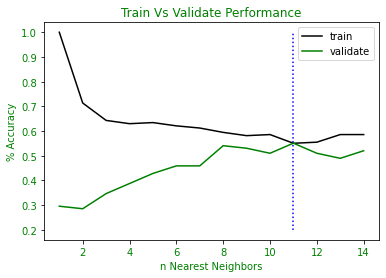

In [8]:
results = utilities.create_results(train, validate, test)
utilities.plot_results(results)

## Takeaway:
* Train and Validate seem to be close at n = 11 having nearly 55% accuracy. 
* This model is being chosen to work on the test set.

## Test Set Performance

In [9]:
# Test with knn, n = 11
knn = KNeighborsClassifier(n_neighbors=11)

# create train and test sets to test below
x_train, y_train, x_validate, y_validate, x_test, y_test = md.xy_train_validate_test(train, validate, test, 'programming_language_99')

# fit model on train, then predict on test
knn = knn.fit(x_train, y_train)
test_prediction = knn.predict(x_test)
print(f'Test Accuracy: {round(knn.score(x_test, y_test), 4) * 100}%')

Test Accuracy: 52.44%


## Modeling Takeaways:

> * Test set accuracy was **52.44%**, beating baseline by **192%**
> * **KNN** was the most accurate model type, without overfitting
> * Encoded dataframe includes **all words, bigrams** and **trigrams**



## Conclusion:

> * Python, C++, and Java were the three most popular programming languages used when dealing with Cryptography.
> * The most common words that were used across all the README files were:
    key, use/using, build, cryptography, test, crypto, library, hash, function, io
> * The top 10 words account for 5% of the words found in README files.
> * key , cryptography, crypto, and hash were the most frequently used words that are related with Cryptography
> * Our K Nearest Neighbor model beat baseline with a test sample accuracy of 52.44%, which is a 192% increase in accuracy when compared to baseline.

### With More Time:

> * Gather more README files to expand the dataset.
> * See if there has been a shift in most frequently used programming languages, or if Python has always been the most frequently used.
> * See if the most frequently used words has changed over time
